In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 100em; }</style>"))
# ^This import is to have a larger display on the output, I'm not sure how to
# do that in Notebook

# find and open the Dark FITS files that were exposed for 30 secs and store them all in one list
file_prefix = "lab1_3_2_3.0000000"
file_end = ".DARK.FIT"
pixel_data = [None]*10

for i in range(0, 10, 1):
    filename = file_prefix + str(i) + file_end
    list = fits.open('../Lab_1/images/'+filename)
    image_data = list[0].data
    pixel_data[i] = image_data


/var/folders/74/9yc0dt9d53z15d2qpmgpxv4h0000gn/T/ipykernel_92533/4127876634.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
# open a 2d list to store median values
median_values = np.zeros((1024, 1024))

# run through and calculate the median value for each pixel
for i in range(0, 1024):
    for j in range(0, 1024):
        values = [pixel_data[x][i][j] for x in range(0,10)]
        median_values[i][j] = np.median(values)
        

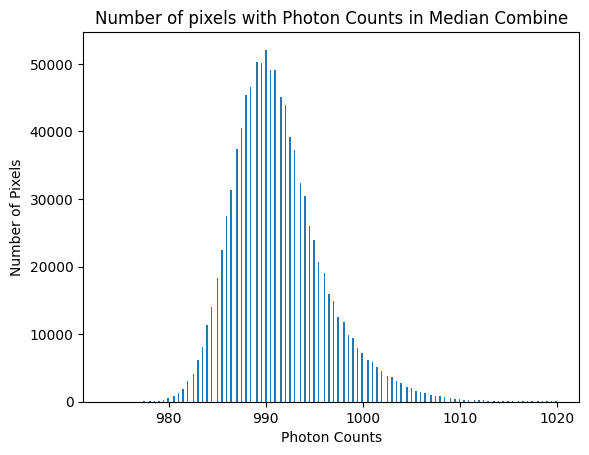

Text(0.5, 1.0, 'Number of Pixels with Photon Counts in Median Combine')

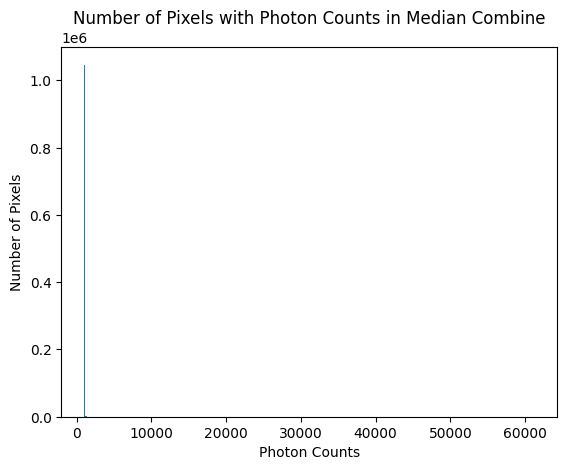

In [4]:
# flatten the data so we can calculate counts of certain values
flat_data = median_values.flatten()
med_min = np.min(flat_data)
# A lot of the data past this point is not a part of the normal distrubution
med_max = 1020
histogram = plt.hist(flat_data, range = (med_min, med_max), bins=300)
plt.xlabel('Photon Counts')
plt.ylabel('Number of Pixels')
plt.title("Number of pixels with Photon Counts in Median Combine")
plt.show()
#I am making a plot so we can see how high some of these pixels go with their counts
histogram2 = plt.hist(flat_data, range = (np.min(flat_data), np.max(flat_data)), bins = 300)
plt.xlabel('Photon Counts')
plt.ylabel('Number of Pixels')
plt.title("Number of Pixels with Photon Counts in Median Combine")

In [5]:
# Creating a list to store the indices of the hot and warm pixels so we can see them on the median combine
# I set the threshold of hot pixels to be ones with >= 5000 counts, and warm pixels from 1300-5000 counts
# Everything below that just seemed like it wasn't that warm/hot

hot_pixels = []
warm_pixels = []
for i in range(0, 1024):
    for j in range(0, 1024):
        if median_values[i][j] >= 5000:
            hot_pixels.append([i, j])
        elif 1300 < median_values[i][j] < 5000:
            warm_pixels.append([i, j])

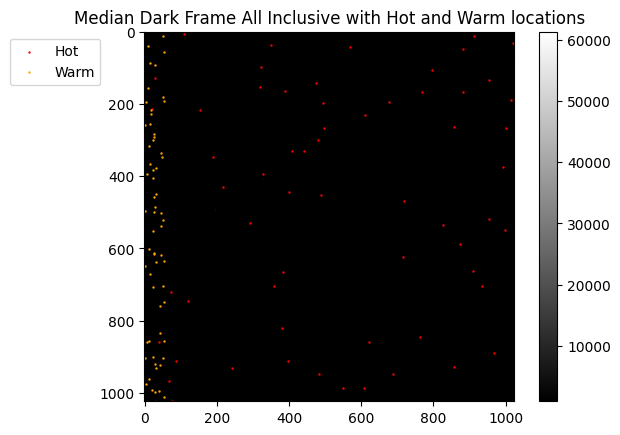

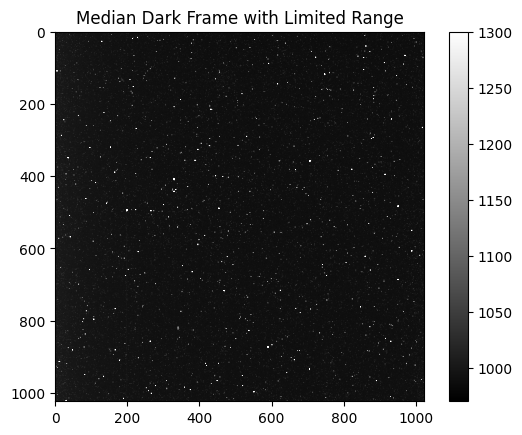

In [6]:
# I set the minimum rounded down to the tens place and set the maximum to the highest count to see how our
# hot and warm pixels appear

minimum = 970
maximum = np.max(flat_data)
plt.imshow(median_values, cmap='gray', vmin=minimum, vmax=maximum)
plt.title("Median Dark Frame All Inclusive with Hot and Warm locations")
plt.colorbar()

# Setting the indices in the lists to actual locations so that we can plot them as points on the image
x_indices = [hot_pixels[x][0] for x in range(0, len(hot_pixels))]
y_indices = [hot_pixels[x][1] for x in range(0, len(hot_pixels))]
xw = [warm_pixels[x][0] for x in range(0, len(hot_pixels))]
yw = [warm_pixels[x][1] for x in range(0, len(hot_pixels))]
plt.scatter(x_indices, y_indices, color='red', s=0.5, label = 'Hot')
plt.scatter(xw, yw, color='orange', s=0.5, label = 'Warm')
plt.legend(bbox_to_anchor=(-0.1, 1))
plt.show()

#Creating the image disregarding the warm and hot pixels
plt.imshow(median_values, cmap='gray', vmin=minimum, vmax=1300)
plt.title("Median Dark Frame with Limited Range")
plt.colorbar()

Text(0.5, 1.0, 'Number of pixels with Photon Counts in One Dark Frame')

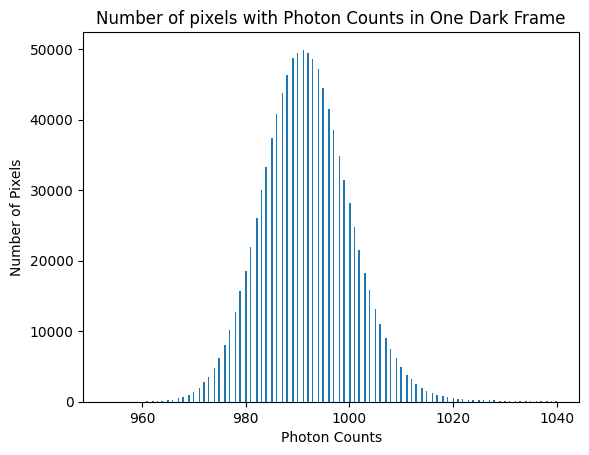

In [7]:
#This is just to see how the counts in one of the images look ignoring pixels not apart of main distribution

index = 0
flat_data = pixel_data[index].flatten()
min0 = np.min(pixel_data[index])
# max0 = np.max(pixel_data[index])
max0 = 1040
histogram = plt.hist(flat_data, range = (min0, max0), bins=300)
plt.xlabel('Photon Counts')
plt.ylabel('Number of Pixels')
plt.title("Number of pixels with Photon Counts in One Dark Frame")

In [8]:
# Here we're running throught the pixels of each image to determine whether they are warm/hot in:
# 1. In the median combine and the image, 2. Just in the image 3. Just in the median combine

both_hot = [None] * 10
both_warm = [None] * 10
median_warm = [None]*10
median_hot = [None]*10
image_warm = [None]*10
image_hot = [None]*10
for i in range(0, 10):
    h = 0
    w=0
    mw = 0
    mh = 0
    iw = 0
    ih = 0
    print(f"\n We are now in Dark image # {i+1}")
    for j in range(0, 1024):
        for k in range(0, 1024):
            if pixel_data[i][j][k] >= 5000 and [j, k] in hot_pixels:
                h += 1
                hot_counts[i] = h
            elif pixel_data[i][j][k] >= 5000 and [j, k] not in hot_pixels:
                ih += 1
                image_hot[i] = (ih)
            elif pixel_data[i][j][k] < 5000 and [j, k] in hot_pixels:
                mh += 1
                median_hot[i] = mh
            elif 1300 < pixel_data[i][j][k] < 5000 and [j, k] in warm_pixels:
                w += 1
                warm_counts[i] = w
            elif 1300 < pixel_data[i][j][k] < 5000 and [j, k] not in warm_pixels:
                iw += 1
                image_warm[i] = iw
            elif pixel_data[i][j][k] < 1300 and [j, k] in warm_pixels:
                mw += 1
                median_only_warm[i] = mw
    print(f"Number of pixels hot in both is {both_hot[i]}")
    print(f"Number of pixels warm in both is {both_warm[i]}")
    print(f"Number of pixels only warm in median and not this image is {median_warm[i]}")
    print(f"Number of pixels only hot in median and not this image is {median_hot[i]}")
    print(f"Number of pixels only hot in this image and not in median is {image_hot[i]}")
    print(f"Number of pixels only warm in this image and not in median is {image_warm[i]}")


 We are now in Dark image # 1


NameError: name 'warm_counts' is not defined

In [226]:
#------------Section 4.2---------------

In [11]:
# find and open the Dark FITS files that were exposed from 10s - 2min in intervals of 10 sec
# and storing them in one file

file_pre = "lab1_dark.000000"
file_suf = ".DARK.FIT"

series_data = [None] * 12 
for i in range(0, 12):
    if i < 8:
        file_pref = file_pre + '0'
        file_name = file_pref + str(i + 2) + file_suf
        list = fits.open("../Lab_1/images/" + file_name)
        image_data = list[0].data
        series_data[i] = image_data
    else:
        file_name = file_pre + str(i + 2) + file_suf
        list = fits.open("../Lab_1/images/" + file_name)
        image_data = list[0].data
        series_data[i] = image_data


In [12]:
# Creating a list of minimums and maximums that set the range to get a good representation of our normal
# distribution, essentially ignoring the outlying warm and hot pixels

from scipy import stats

mins = [950]*6 + [970] * 6
maxs = [1030]*2 + [1050]*5 + [1060]*2 + [1070] + [1080]*2
mean_counts = []
st_devs = []
stat_uncs = []

# Running through the images and flattening the data, sampling our data to including the counts within
# the range set to represent our data. We calculate the mean, standard deviation, and uncertainty of the mean
# of this sample, and store these values

for i in range(0,12):
    flat_data = series_data[i].flatten()

    series_min = mins[i]
    series_max = maxs[i]
    data_set = []
    for j in range(0, len(flat_data)):
        if series_min < flat_data[j] < series_max:
            data_set.append(flat_data[j])

    mean = np.mean(data_set)
    mean_counts.append(mean)
    st_dev = stats.tstd(data_set)
    st_devs.append(st_dev)
    stat_unc = mean / np.sqrt(len(data_set))
    stat_uncs.append(stat_unc)

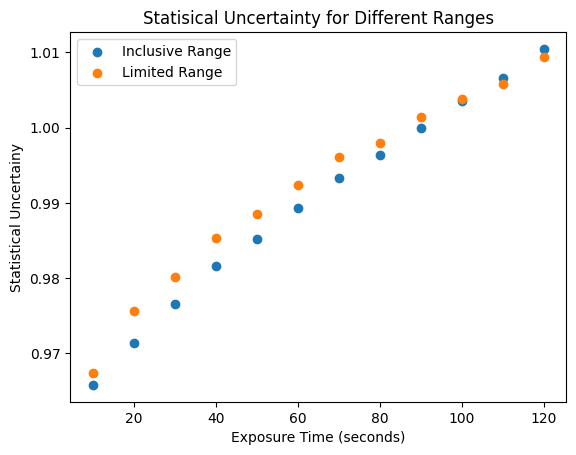

In [13]:
# Here we are calculating the uncertainty once again but this time including more and then all of
# the data points collected, so that we can see the systemic uncertainty
whole_st_devs = []
whole_stat_uncs = []

for i in range(0,12):
    flat_data = series_data[i].flatten()

    series_min = np.min(flat_data)
    series_max = np.max(flat_data)
    data_set = []
    mean = np.mean(flat_data)
    st_dev = stats.tstd(flat_data)
    whole_st_devs.append(st_dev)
    stat_unc = mean / np.sqrt(len(flat_data))
    whole_stat_uncs.append(stat_unc)

exposure_times = [10 * x for x in range(1, 13)]

plt.scatter(exposure_times, whole_stat_uncs, label="Inclusive Range")
plt.scatter(exposure_times, stat_uncs, label="Limited Range")
plt.title("Statisical Uncertainty for Different Ranges")
plt.xlabel("Exposure Time (seconds)")
plt.ylabel("Statistical Uncertainy")
plt.legend()

The dark current rate is 0.3068 +/- 0.0106 e/p/s
The offsest is 987.5114 +/- 0.7800


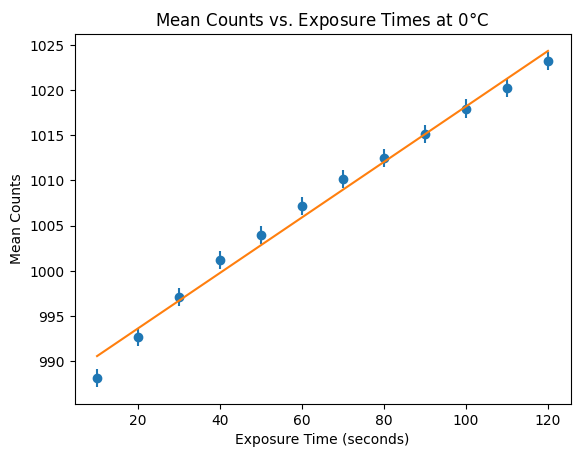

In [14]:
# importing curve_fit to fit a line to our data

from scipy.optimize import curve_fit

# creating a list of the exposure time values in seconds and plotting our mean counts to their
# corresponding exposure times


plt.scatter(exposure_times, mean_counts)
plt.errorbar(exposure_times, mean_counts, yerr=stat_uncs, linestyle='')
plt.xlabel("Exposure Time (seconds)")
plt.ylabel("Mean Counts")
plt.title("Mean Counts vs. Exposure Times at 0$\\degree$C")

# defining the function of a line so that we can model our data
def linear(exposure, dark_current_rate, offset):
    """
    fitting a line to our data of mean counts vs. exposure time
    
    param exposure: The amount of time the frame was exposed for
    param dark_current_rate: the dark current in electrons per pixel per second
    param offset: The number of electrons the measurements are offset by
    
    """
    return dark_current_rate * exposure + offset

# extracting our dark current rate and the offset from the fit, along with the covariance of thes vlaues
parameters, covariance = curve_fit(linear, exposure_times, mean_counts)
dark_current_rate, offset = parameters
uncertainty_in_dcr = np.sqrt(covariance[0][0])
uncertainty_in_offset = np.sqrt(covariance[1][1])
print(f"The dark current rate is {dark_current_rate:.4f} +/- {uncertainty_in_dcr:.4f} e/p/s")
print(f"The offsest is {offset:.4f} +/- {uncertainty_in_offset:.4f}")
model_mean_counts = [linear(exposure, dark_current_rate, offset) for exposure in exposure_times]
plt.plot(exposure_times, model_mean_counts)

Our farthest mean count is within 0.2913 sigmas


Text(0.5, 0, 'Exposure Times (seconds)')

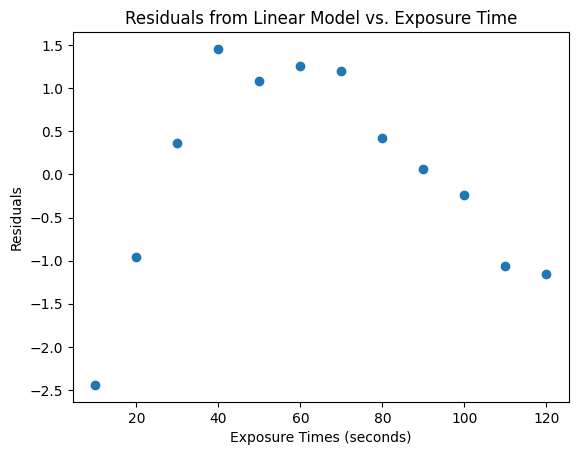

In [15]:
# Calculating the residuals by finding the difference between actual value and model value
residuals = []

for i in range(0, len(mean_counts)):
    distance = mean_counts[i] - linear(exposure_times[i], dark_current_rate, offset)
    residuals.append(distance)

plt.scatter(exposure_times, residuals)
print(f"Our farthest mean count is within {np.abs(residuals[0]) / st_devs[0]:.4f} sigmas")
plt.title("Residuals from Linear Model vs. Exposure Time")
plt.ylabel("Residuals")
plt.xlabel("Exposure Times (seconds)")

In [17]:
# Here we are estimating the dark current of our Bias Frame and our Dark frame at -15 degrees C

bias = fits.open("../Lab_1/images/lab1_3_2_4.00000010.BIAS.FIT")
dark = fits.open("../Lab_1/images/lab1_3_2_4.00000011.DARK.FIT")

bias_frame = bias[0].data
dark_frame = dark[0].data

flat_dark = dark_frame.flatten()
flat_bias = bias_frame.flatten()

dark_time = 120
bias_time = 120

bias_mean = np.mean(flat_bias)
dark_mean = np.mean(flat_dark)

current_bias = (bias_mean - offset) / bias_time
current_dark = (dark_mean - offset) / dark_time

print(current_bias)
print(current_dark)

-0.07684098819817488
0.844931062659369
